In [3]:
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def geoplot_tmr(br_mun, df_tmr_mun2, year):
    br_mun_tmr_mun_year = br_mun.merge(
        df_tmr_mun2.query(f"ano_referencia == {year}"),
        how="left",
        left_on="CD_MUN",
        right_on="id_municipio",
    )
    f, ax = plt.subplots(figsize=(16, 16))
    br_mun.plot(ax=ax, color="#ddd")  # Base
    br_mun_tmr_mun_year.plot(
        ax=ax,
        column="tarifa_media_trend",
        cmap="Blues",
    )
    ax.set_xlim(-75, -33)
    ax.set_ylim(-35, 6)
    ax.text(
        x=-70,
        y=-25,
        s=f"{year}",
        fontsize=90,
    )
    f.tight_layout()
    ax.axis("off")
    return f, ax

In [5]:
plots_dir = Path("img", "maps")
plots_dir.mkdir(parents=True, exist_ok=True)
data_dir = Path("data")

br_mun = gpd.read_file(data_dir / "BR_Municipios_2021.zip")
br_mun = br_mun.assign(CD_MUN=lambda x: x["CD_MUN"].astype("int64"))
df_tmr_mun3 = pd.read_csv(data_dir / "processed_tmr_mun3.csv")

In [6]:
# CONFIGURATION
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16

In [ ]:
for i, year in enumerate(range(1995, 2021 + 1)):
    print(year)
    f, ax = geoplot_tmr(br_mun, df_tmr_mun3, year=year)
    f.savefig(plots_dir / f"{i:03}.png", dpi=300)
    plt.close()

In [7]:
df_clusters = pd.read_csv("data/clusters.csv")
df_clusters

,id_municipio,cluster
0,1100023,10
1,1100031,10
2,1100049,0
3,1100056,10
4,1100064,10
...,...,...
1828,5220603,8
1829,5221403,8
1830,5221700,3
1831,5221858,3


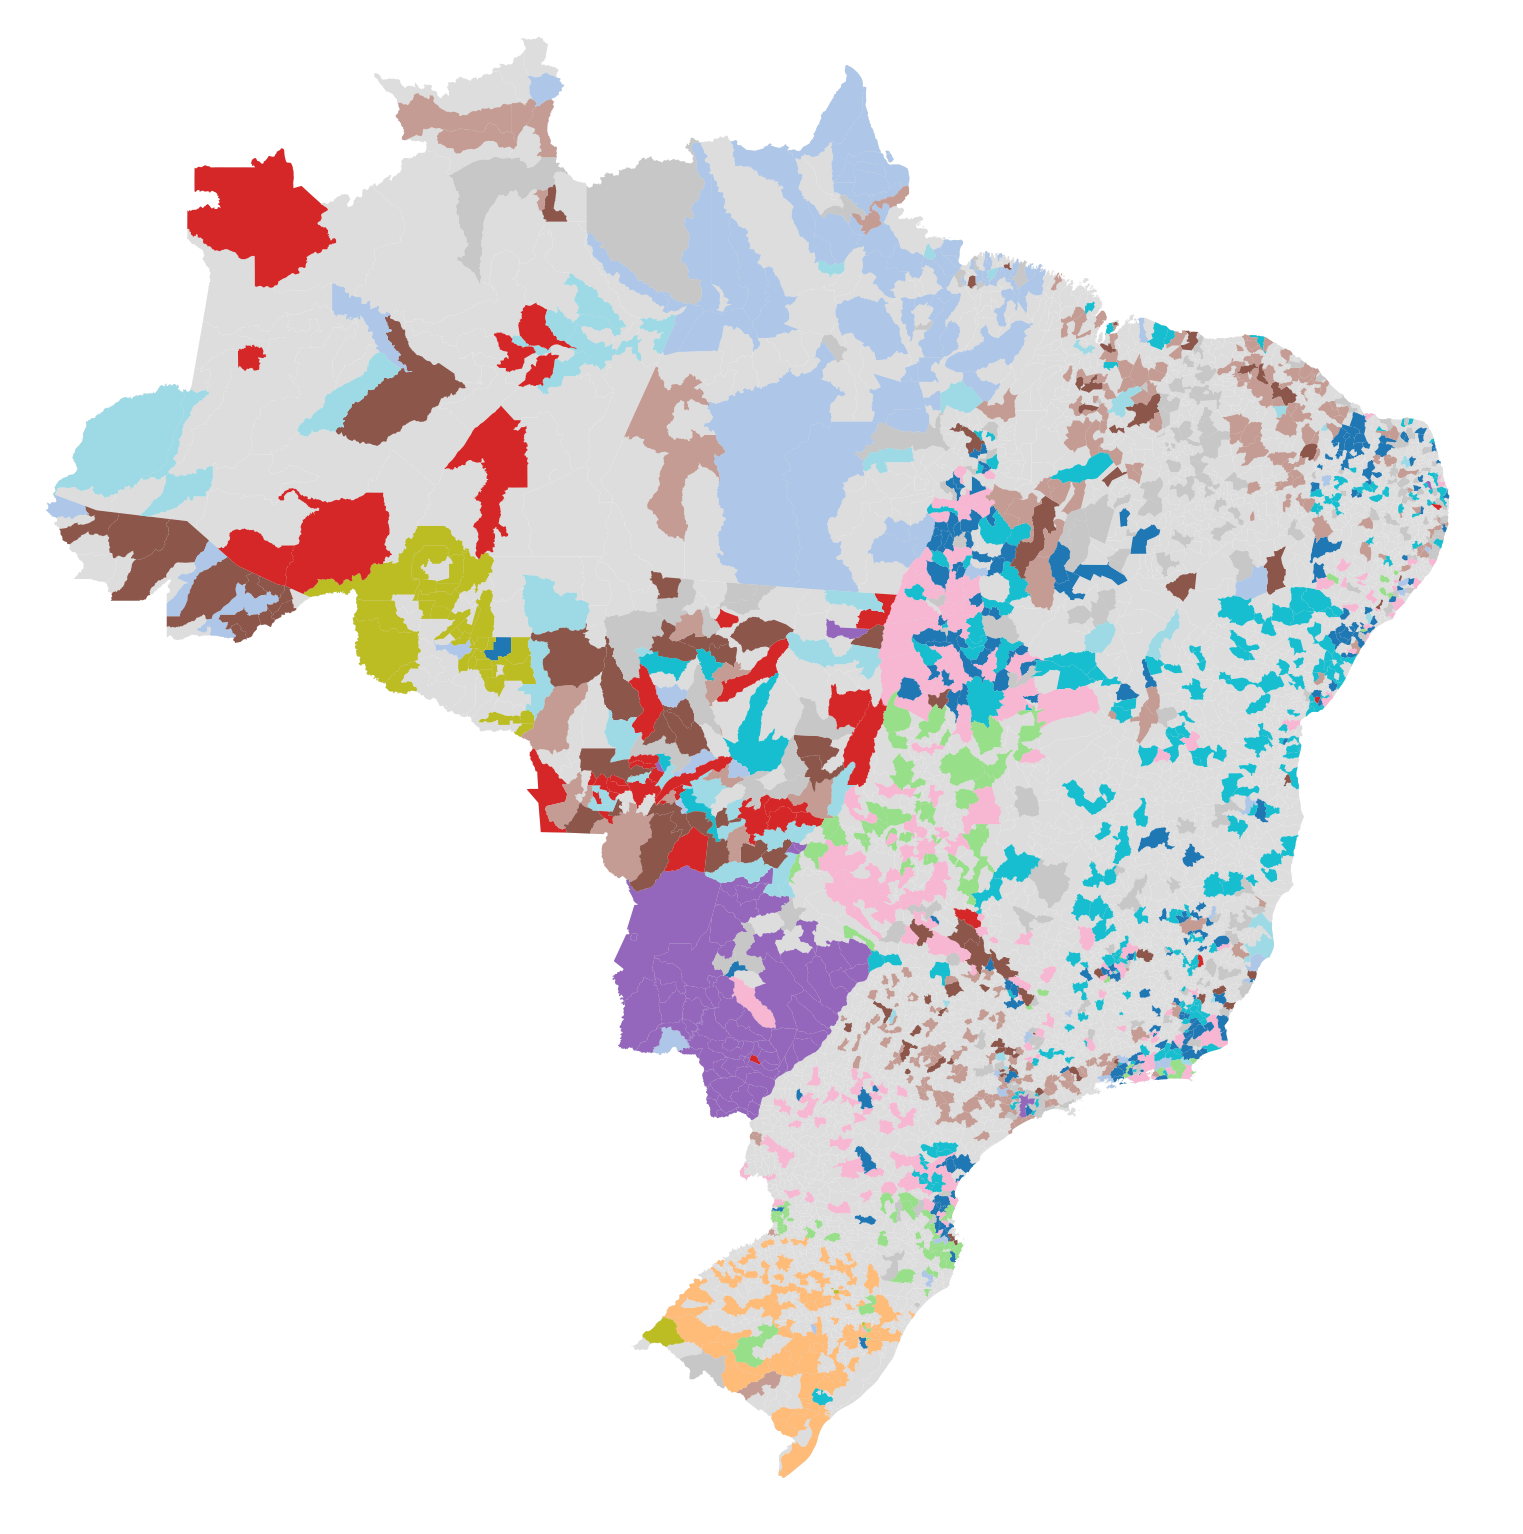

In [13]:
br_mun_clusters = br_mun.merge(
    df_clusters,
    how="left",
    left_on="CD_MUN",
    right_on="id_municipio",
)
f, ax = plt.subplots(figsize=(16, 16))
br_mun.plot(ax=ax, color="#ddd")  # Base
br_mun_clusters.plot(
    ax=ax,
    column="cluster",
    cmap="tab20",
)
ax.set_xlim(-75, -33)
ax.set_ylim(-35, 6)
f.tight_layout()
ax.axis("off")
f.savefig(plots_dir / "clusters.png", dpi=300)